<a href="https://colab.research.google.com/github/nhimoc31231020361-cmd/nhimoc.github.io/blob/nm-pages/K-MEAN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORT THƯ VIỆN CẦN THIẾT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**2. ĐỌC DỮ LIỆU**

In [ ]:
df = pd.read_csv("financials_features_scaled.csv")
print("✅ Dữ liệu:", df.shape)
df.head()

✅ Dữ liệu: (505, 15)


,price_earnings,price_book,price_sales,valuation_z__scaled,earnings_share,dividend_yield,ebitda,ebitda_log__scaled,profitability_ratio__scaled,market_cap,price,52w_range__scaled,price_to_52w_high__scaled,market_cap_log__scaled,dividend_flag__scaled
0,24.31,11.34,4.390271,0.908281,7.92,2.332862,9.048000e+09,1.102991,-0.189244,1.387211e+11,222.89,-0.229478,0.269950,1.477267,0.0
1,27.76,6.35,3.575483,0.502909,1.70,1.147959,6.010000e+08,-0.632341,-0.336064,1.078342e+10,60.24,0.083849,0.112032,-0.541755,0.0
2,22.51,3.19,3.740480,0.076988,0.26,1.908982,5.744000e+09,0.812210,-0.328124,1.021210e+11,56.27,-0.395256,0.517180,1.235165,0.0
3,19.41,26.14,6.291571,2.228956,3.29,2.499560,1.031000e+10,1.186549,-0.318950,1.813863e+11,108.48,-1.790810,2.451493,1.689222,0.0
4,25.47,10.62,2.604117,0.685735,5.44,1.714470,5.643228e+09,0.800883,-0.314349,9.876586e+10,150.51,0.011210,0.435615,1.208760,0.0


**3. CHỌN CÁC BIẾN ĐẦU VÀO**

In [ ]:
features = [
    "valuation_z__scaled",
    "ebitda_log__scaled",
    "profitability_ratio__scaled",
    "market_cap_log__scaled",
    "52w_range__scaled",
    "price_to_52w_high__scaled",
    "dividend_flag__scaled"
]

X = df[features]

**4. TÌM CỤM TỐI ƯU (Elbow Method)**

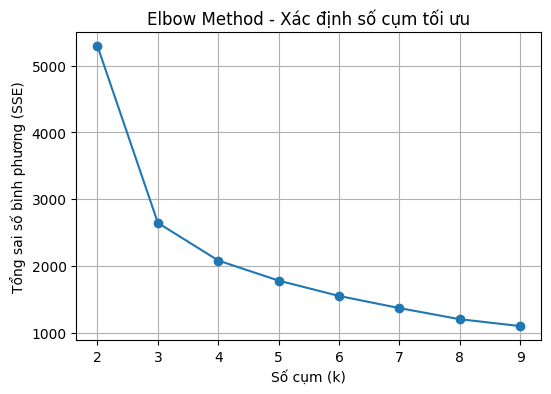

In [ ]:
sse = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, sse, marker='o')
plt.title("Elbow Method - Xác định số cụm tối ưu")
plt.xlabel("Số cụm (k)")
plt.ylabel("Tổng sai số bình phương (SSE)")
plt.grid(True)
plt.show()


**5. TÍNH HỆ SỐ SILHOUTTE**

In [ ]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k = {k} → Silhouette Score = {score:.3f}")

k = 2 → Silhouette Score = 0.776
k = 3 → Silhouette Score = 0.779
k = 4 → Silhouette Score = 0.571
k = 5 → Silhouette Score = 0.385
k = 6 → Silhouette Score = 0.329
k = 7 → Silhouette Score = 0.329


**6. CHẠY MÔ HÌNH K-MEAN VỚI SỐ CỤM TỐI ƯU VÀ PHÂN TÍCH ĐẶC TRƯNG TRUNG BÌNH CỦA TỪNG CỤM**

In [ ]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)


cluster_profile = df.groupby("cluster")[features].mean().round(3)
print("📊 Trung bình đặc trưng theo cụm:")
display(cluster_profile)

📊 Trung bình đặc trưng theo cụm:


,valuation_z__scaled,ebitda_log__scaled,profitability_ratio__scaled,market_cap_log__scaled,52w_range__scaled,price_to_52w_high__scaled,dividend_flag__scaled
cluster,,,,,,,
0,0.309,0.194,0.401,0.108,-0.108,0.110,-0.169
1,-0.335,-13.568,-1.235,0.231,0.025,-0.020,-0.091
2,12.374,-0.480,-0.231,0.619,-0.437,0.595,-0.450


**7. TRỰC QUAN HOÁ BẰNG PCA**

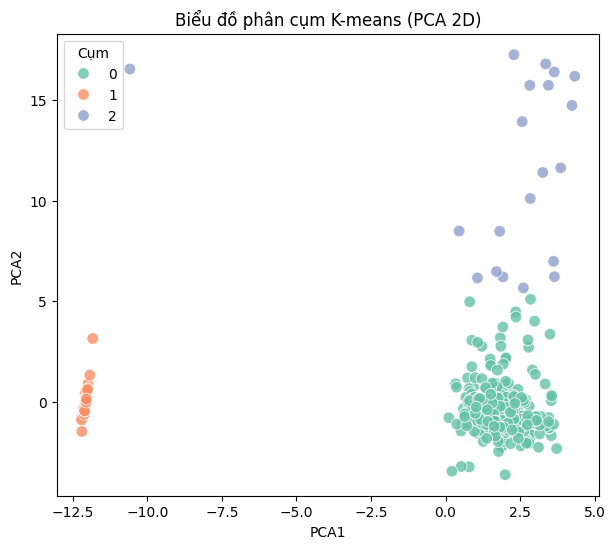

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df["PCA1"], df["PCA2"] = pca_result[:,0], pca_result[:,1]

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df, x="PCA1", y="PCA2",
    hue="cluster", palette="Set2", s=70, alpha=0.8
)
plt.title("Biểu đồ phân cụm K-means (PCA 2D)")
plt.legend(title="Cụm", loc="best")
plt.show()